In [194]:
import os
from Pre_Processing_Function import preprocess_text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [195]:
# Define the paths to the positive and negative reviews
pos_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\Dataset\pos'
neg_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\Dataset\neg'

# Extract Texts from Folders
def read_files_from_directory(reviews_path):
    reviews = []
    for filename in os.listdir(reviews_path):
        if filename.endswith(".txt"):
            with open(os.path.join(reviews_path, filename), 'r', encoding='ISO-8859-1') as file:
                reviews.append(file.read())
    return reviews

In [196]:
# Read the positive and negative reviews
original_pos_reviews = read_files_from_directory(pos_reviews_path)
original_neg_reviews = read_files_from_directory(neg_reviews_path)

In [197]:
# Preprocess the reviews
positive_reviews = preprocess_text(original_pos_reviews)
negative_reviews = preprocess_text(original_neg_reviews)

In [198]:
# Concatenate the list of reviews into a single string
all_reviews = [' '.join(word) for word in positive_reviews + negative_reviews]

# Create labels for the reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_reviews)
y = labels

In [199]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [200]:
def eval_model(classifier, model_name):
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Print the accuracy of the model
    print(model_name, " Test Accuracy:", accuracy * 100, "%")

    # Calculate Precision, Recall, F1 Score
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Print Precision, Recall, F1 Score
    print(model_name, " Precision:", precision * 100, "%")
    print(model_name, " Recall:", recall * 100, "%")
    print(model_name, " F1 Score:", f1 * 100, "%")
    return accuracy, precision, recall, f1

In [201]:
# Train Logistic Regression
lr_classifier = LogisticRegression(random_state=42, C=100, max_iter=100, solver='newton-cg')
lr_classifier.fit(X_train, y_train)

# Evaluate Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = eval_model(lr_classifier, "Logistic Regression")

Logistic Regression  Test Accuracy: 84.25 %
Logistic Regression  Precision: 83.33333333333334 %
Logistic Regression  Recall: 85.42713567839196 %
Logistic Regression  F1 Score: 84.36724565756823 %


In [202]:
# Train Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate Support Vector Machine
svm_accuracy, svm_precision, svm_recall, svm_f1 = eval_model(svm_classifier, "Support Vector Machine")

Support Vector Machine  Test Accuracy: 83.0 %
Support Vector Machine  Precision: 82.26600985221675 %
Support Vector Machine  Recall: 83.91959798994975 %
Support Vector Machine  F1 Score: 83.08457711442786 %


In [203]:
# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluate Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = eval_model(nb_classifier, "Naive Bayes")

Naive Bayes  Test Accuracy: 81.0 %
Naive Bayes  Precision: 80.29556650246306 %
Naive Bayes  Recall: 81.90954773869346 %
Naive Bayes  F1 Score: 81.09452736318408 %


In [204]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth= 30, min_samples_leaf= 2, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = eval_model(rf_classifier, "Random Forest")

Random Forest  Test Accuracy: 79.25 %
Random Forest  Precision: 79.89690721649485 %
Random Forest  Recall: 77.88944723618091 %
Random Forest  F1 Score: 78.88040712468194 %


In [205]:
# Define lists to store performance metrics for each model
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, nb_accuracy, rf_accuracy]
precisions = [lr_precision, svm_precision, nb_precision, rf_precision]
recalls = [lr_recall, svm_recall, nb_recall, rf_recall]
f1_scores = [lr_f1, svm_f1, nb_f1, rf_f1]

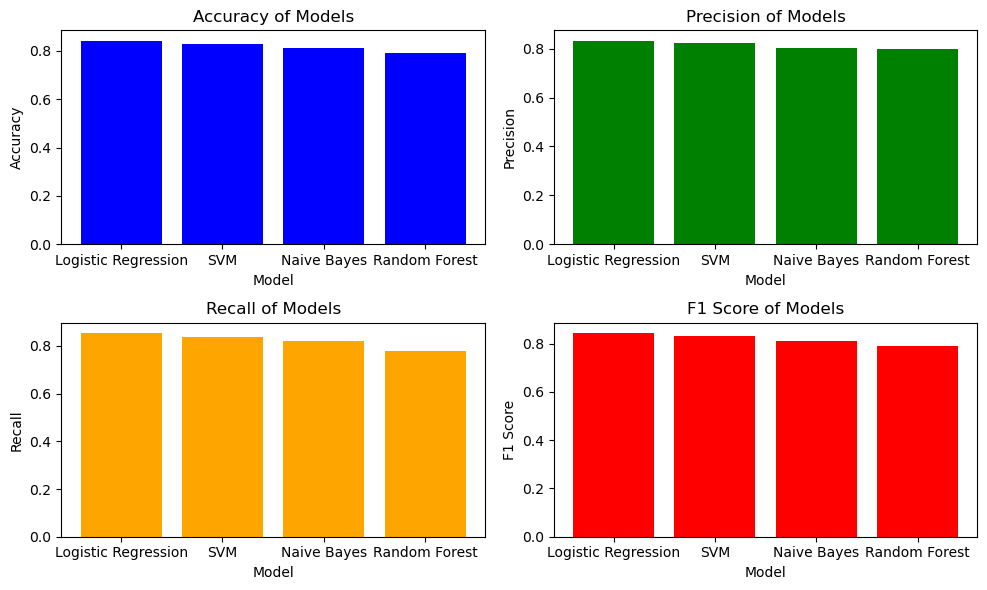

In [206]:
# Plot performance metrics for each model
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='green')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='orange')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

## New Huge Dataset For Testing

In [207]:
# Define the paths to the positive and negative reviews
test_pos_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\Final_Test\rt-polarity_pos.txt'
test_neg_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\Final_Test\rt-polarity_neg.txt'

# Extract reviews from Folders
def read_test_files_from_directory(reviews_path):
    with open(reviews_path, 'r', encoding='ISO-8859-1') as file:
        # Read each line and store it in a list
        test_reviews = [line.strip() for line in file]
    return test_reviews

In [208]:
# Read the positive and negative reviews
test_pos_reviews = read_test_files_from_directory(test_pos_reviews_path)
test_neg_reviews = read_test_files_from_directory(test_neg_reviews_path)

In [209]:
# Preprocess the reviews
test_positive_reviews = preprocess_text(test_pos_reviews)
test_negative_reviews = preprocess_text(test_neg_reviews)

In [210]:
# Concatenate the list of reviews into a single string
all_reviews = [' '.join(word) for word in test_positive_reviews + test_negative_reviews]

# Create labels for the reviews
labels = [1] * len(test_positive_reviews) + [0] * len(test_negative_reviews)

X_final_test = vectorizer.transform(all_reviews)
y_final_test = labels

In [211]:
results = lr_classifier.predict(X_final_test)
test_accuracy = accuracy_score(y_final_test, results)

In [212]:
print("Final Test Accuracy using Logistic Regression:", test_accuracy * 100, "%")

Final Test Accuracy using Logistic Regression: 69.6398424310636 %
